Find approximately
$ \int_{-2}^{-1} (1 - \cot x)dx $,
using the iterative practical method for approximate calculation of integrals and Simposon's rule. 

The error $ \epsilon $ must not exceed $ 10^{-5} $.

In [16]:
import numpy as np

In [35]:
epsilon = 0.00001

a = -2
b = -1

def f(x):
    ctg = lambda x: np.cos(x) / np.sin(x)
    return 1 - ctg(x)

In [36]:
def simpson(subintervals):
    points = np.linspace(a, b, subintervals + 1)  # creates n + 1 equally spaced-out points to form n subintervals

    return ((b - a) / (6 * subintervals)) * sum(
        f(points[i-1]) + 4*f((points[i-1] + points[i]) / 2) +
        f(points[i]) for i in range(1, subintervals)
    )

In [37]:
integral_value_at_n_minus_one_points = simpson(1)
integral_value_at_n_points = simpson(2)

ctr = 3

while (True):
    if abs(integral_value_at_n_minus_one_points - integral_value_at_n_points) < epsilon:
        break

    integral_value_at_n_minus_one_points = integral_value_at_n_points
    integral_value_at_n_points = simpson(ctr)
    ctr += 1

print(integral_value_at_n_points)

1.0734804264766853


>Let's verify the answer from above

In [25]:
import matplotlib.pyplot as plt

In [26]:
import sys
sys.path.append('../util')

from lagrange_poly import lagrange_poly

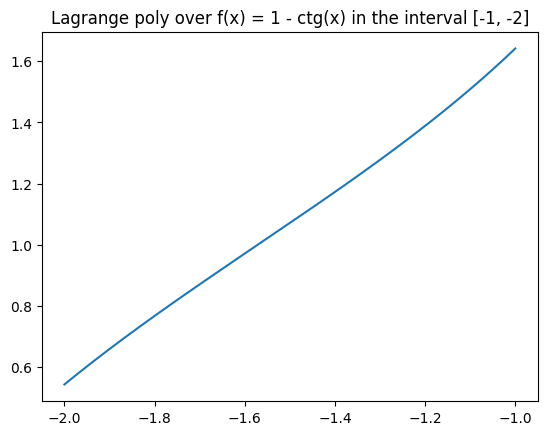

In [28]:
x_axis = np.linspace(a, b, 200)

plt.plot(x_axis, lagrange_poly(np.linspace(a, b, 12), f, x_axis))
plt.title('Lagrange poly over f(x) = 1 - ctg(x) in the interval [-1, -2]')
plt.show()

In [31]:
np.trapz(lagrange_poly(np.linspace(a, b, 12), f, x_axis), x_axis)

1.0775211376852467